<a href="https://colab.research.google.com/github/luizleroy/treinamentos/blob/develop/clustering/hierarchicalCluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução a Clusterização

**A principal ferramenta visual, que utilizaremos para validar a nossa Clusterização das causas de interrupções na rede de distribuição, será o Dendrograma**

## Dendrograma
Fonte [texto do Minitab](https://support.minitab.com/pt-br/minitab/18/help-and-how-to/modeling-statistics/multivariate/how-to/cluster-observations/interpret-the-results/all-statistics-and-graphs/dendrogram/#:~:text=O%20dendrograma%20%C3%A9%20um%20diagrama,em%20seus%20n%C3%ADveis%20de%20similaridade.)

O dendrograma é um diagrama de árvore que exibe os grupos formados por agrupamento de observações em cada passo e em seus níveis de similaridade. O nível de similaridade é medido ao longo do eixo vertical (alternativamente, você pode exibir o nível de distância) e as diferentes observações são listadas ao longo do eixo horizontal.

Interpretação
Use o dendrograma para visualizar como os agrupamentos são formados em cada passo e para avaliar os níveis de similaridade (ou distância) dos agrupamentos que são formados.

Para exibir os níveis de similaridade (ou distância), mantenha seu ponteiro sobre uma linha horizontal no dendrograma. O padrão de como a similaridade ou os valores de distância mudam de um passo para outro pode ajudar a escolher o agrupamento final dos seus dados. O passo onde os valores mudam abruptamente podem identificar um bom ponto para definir o agrupamento final.

A decisão sobre o agrupamento final também é chamada corte do dendrograma. O corte do dendrograma é similar ao desenho de uma linha por todo o dendrograma para especificar o agrupamento final. Você também pode comparar os dendrogramas a agrupamentos finais diferentes para determinar qual agrupamento final faz mais sentido para os dados.

In [67]:
import pandas as pd
import numpy as np

In [68]:
from google.colab import files
import subprocess

# Input e análise inicial

**Notebook** destinado a ilustrar a base do processo de clusterização e sua exibição via, como exemplo, um Dendrograma. 

In [69]:
# file = 'base.csv'
# file = 'volume.csv'
file = 'estadosBR.csv'
proc=subprocess.Popen('ls ' + file, shell=True, stdout=subprocess.PIPE, )
output=proc.communicate()[0]

**Realizar upload de arquivo no formato CSV e com nome *base.csv*.**

In [70]:
if not output:
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

In [71]:
df = pd.read_csv(file, encoding='latin-1', sep=',')
df = df.set_index('label')
df

,x,y
label,,
AC,-8.77,-70.55
AL,-9.71,-35.73
AM,-3.07,-61.66
AP,1.41,-51.77
BA,-12.96,-38.51
CE,-3.71,-38.54
DF,-15.83,-47.86
ES,-19.19,-40.34
GO,-16.64,-49.31


In [72]:
df.describe()

,x,y
count,27.000000,27.000000
mean,-12.434815,-47.680000
std,8.640646,9.357188
min,-30.010000,-70.550000
25%,-18.645000,-52.030000
50%,-10.900000,-47.860000
75%,-6.295000,-39.440000
max,1.890000,-35.070000


In [73]:
base = df.values

Base para realizar uma análise de espalhamento simples:

In [74]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [75]:
hc = AgglomerativeClustering(linkage = 'ward')
previsoes = hc.fit_predict(base)
previsoes


array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0])

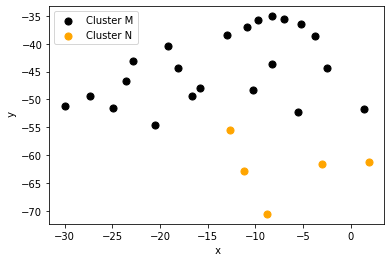

In [76]:
plt.scatter(base[previsoes == 0, 0], base[previsoes == 0, 1], s = 50, c = 'black', label = 'Cluster M')
plt.scatter(base[previsoes == 1, 0], base[previsoes == 1, 1], s = 50, c = 'orange', label = 'Cluster N')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.legend()

# Transformação do tipo *StandardScaler*

Transformando estatisticamente os dados...

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
scaler = StandardScaler()
transform = scaler.fit_transform(base)
transform

array([[ 0.43221621, -2.49066898],
       [ 0.3213557 ,  1.30142083],
       [ 1.10445546, -1.52249901],
       [ 1.63281193, -0.44542353],
       [-0.06193861,  0.99866351],
       [ 1.02897597,  0.99539635],
       [-0.40041698, -0.01960299],
       [-0.79668433,  0.79936643],
       [-0.49594571, -0.17751598],
       [ 1.16578255,  0.36810062],
       [-0.02419887, -0.84292864],
       [-0.95236079, -0.74709179],
       [-0.66813331,  0.35938818],
       [ 0.81433115, -0.5020544 ],
       [ 0.63388798,  1.32102382],
       [-1.46892358, -0.42146432],
       [ 0.4900052 ,  1.37329846],
       [ 0.4900052 ,  0.43562203],
       [-1.22715332,  0.49334195],
       [ 0.85089153,  1.21538548],
       [ 0.14327126, -1.64665129],
       [-2.07275955, -0.3855255 ],
       [ 1.68942155, -1.47458059],
       [-1.75668916, -0.1916737 ],
       [ 0.18101101,  1.15548745],
       [-1.31088839,  0.11326173],
       [ 0.25766987, -0.06207614]])

In [79]:
pd.DataFrame(transform).describe()

,0,1
count,2.700000e+01,2.700000e+01
mean,-3.063393e-16,7.972018e-16
std,1.019049e+00,1.019049e+00
min,-2.072760e+00,-2.490669e+00
25%,-7.324088e-01,-4.737390e-01
50%,1.810110e-01,-1.960299e-02
75%,7.241096e-01,8.973814e-01
max,1.689422e+00,1.373298e+00


In [80]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [81]:
link = linkage(transform, method = 'ward')
link

array([[14.        , 16.        ,  0.1530846 ,  2.        ],
       [ 6.        ,  8.        ,  0.18455961,  2.        ],
       [ 1.        , 24.        ,  0.20246773,  2.        ],
       [ 5.        , 19.        ,  0.28303583,  2.        ],
       [15.        , 23.        ,  0.36825637,  2.        ],
       [18.        , 25.        ,  0.38919473,  2.        ],
       [ 4.        , 29.        ,  0.44847757,  3.        ],
       [ 7.        , 12.        ,  0.45837346,  2.        ],
       [21.        , 31.        ,  0.53887667,  3.        ],
       [17.        , 26.        ,  0.54925693,  2.        ],
       [ 2.        , 22.        ,  0.58692547,  2.        ],
       [27.        , 30.        ,  0.63455045,  4.        ],
       [ 3.        , 13.        ,  0.82043759,  2.        ],
       [10.        , 20.        ,  0.82098499,  2.        ],
       [32.        , 34.        ,  0.85342855,  4.        ],
       [ 9.        , 36.        ,  0.9381234 ,  3.        ],
       [11.        , 28.

Text(0, 0.5, 'Distância Euclidiana Transformada')

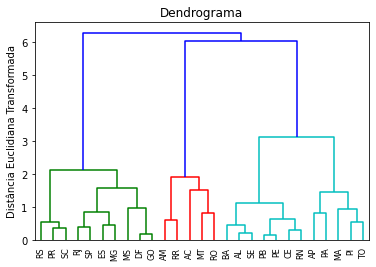

In [82]:
dendrogram(link, leaf_rotation=90, leaf_font_size=8, labels=df.index)
#dendrograma = dendrogram(link)
plt.title('Dendrograma')
plt.ylabel('Distância Euclidiana ''Transformada''')



---



In [83]:
hc = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')
# hc = AgglomerativeClustering(n_clusters = 2, linkage = 'ward')
previsoes = hc.fit_predict(transform)
previsoes

array([2, 0, 2, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1,
       2, 1, 0, 1, 0])

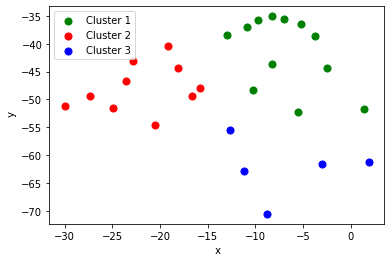

In [84]:
plt.scatter(base[previsoes == 0, 0], base[previsoes == 0, 1], s = 50, c = 'green', label = 'Cluster 1')
plt.scatter(base[previsoes == 1, 0], base[previsoes == 1, 1], s = 50, c = 'red', label = 'Cluster 2')
plt.scatter(base[previsoes == 2, 0], base[previsoes == 2, 1], s = 50, c = 'blue', label = 'Cluster 3')
# plt.scatter(base[previsoes == 0, 0], base[previsoes == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
# plt.scatter(base[previsoes == 1, 0], base[previsoes == 1, 1], s = 50, c = 'green', label = 'Cluster 2')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.legend()  

# Análise final apenas para dados em *base.csv*

Estudo de colaboradores de idade abaixo de 60 anos

In [85]:
base = np.array([[20,100],[20,1000],[21,2900],[27,2200]
                ,[30,150],[32,5900],[37,11050],[39,4100],[39,7000]
                ,[41,5100],[45,250],[46,9000],[48,16500]
                ,[52,15000],[53,150],[53,1950],[55,20000]
                 ])

In [86]:
scaler = StandardScaler()
transform = scaler.fit_transform(base)

In [87]:
link = linkage(transform, method = 'ward')
link

array([[ 0.        ,  1.        ,  0.14796552,  2.        ],
       [ 7.        ,  9.        ,  0.23763965,  2.        ],
       [14.        , 15.        ,  0.29593105,  2.        ],
       [12.        , 13.        ,  0.42259793,  2.        ],
       [ 3.        ,  4.        ,  0.42407337,  2.        ],
       [ 2.        , 17.        ,  0.45699095,  3.        ],
       [ 8.        , 18.        ,  0.46626176,  3.        ],
       [10.        , 19.        ,  0.80696174,  3.        ],
       [ 5.        , 23.        ,  0.81185825,  4.        ],
       [ 6.        , 11.        ,  0.84250598,  2.        ],
       [16.        , 20.        ,  0.94674059,  3.        ],
       [21.        , 22.        ,  1.0862072 ,  5.        ],
       [25.        , 26.        ,  1.31742805,  6.        ],
       [24.        , 29.        ,  2.82734939,  9.        ],
       [28.        , 30.        ,  4.44404392, 14.        ],
       [27.        , 31.        ,  5.78567728, 17.        ]])

Text(0, 0.5, 'Distância Euclidiana Transformada')

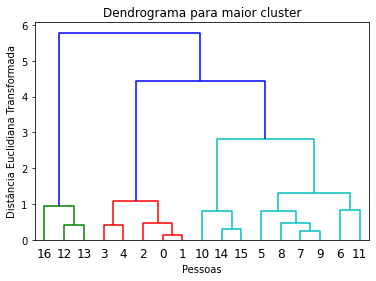

In [88]:
dendrograma = dendrogram(link)
plt.title('Dendrograma para maior cluster')
plt.xlabel('Pessoas')
plt.ylabel('Distância Euclidiana ''Transformada''')